# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Installing citipy via jupyter notebook
# to determine city based on latitude and longitude
# ! pip install citipy

In [55]:
# Importing packages and API key
% matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from citipy import citipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Remember to enter in the cell twice for this to work
from weatherweatherlang import owm_key

# Creating variables for range for latitude and longitude
lat_range = (-90, 90)
lon_range = (-180, 180)

# Creating lists for holding lat_lons, cities, and country codes
lat_lons = []
cities = []
countries = []

## Generate Cities List

In [2]:
# When running, need to reset everything so that we're 
# not generating too many API calls

# Creating a set of random lat and lon combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identifing nearest city for each lat, lon combination
# (Using functions and variables already defined in citipy)
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    country = citipy.nearest_city(lat_lon[0], lat_lon[1]).country_code
    
# Making sure that duplicate cities are not added by making
# appends conditional
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Printing the city count to confirm sufficient 
# count for JSON requests
len(cities)

626

In [3]:
# Making an initial dataframe for these pairings
citiweather_df = pd.DataFrame({'City':cities, 'Country Code':countries})

# Checking if city-country code pairings are accurate
citiweather_df.head(3)
citiweather_df.tail(3)

# Adding additional columns to dataframe to add from later OWM requests
citiweather_df['Lat'] = ""
citiweather_df['Lon'] = ""
citiweather_df['Date'] = ""
citiweather_df['Temp (F)'] = ""
citiweather_df['Humidity'] = ""
citiweather_df['Cloudiness'] = ""
citiweather_df['Wind Speed'] = ""
citiweather_df.head(3)

,City,Country Code
0,northam,au
1,khani,ru
2,namibe,ao


,City,Country Code
623,cagliliog,ph
624,kindia,gn
625,itaituba,br


,City,Country Code,Lat,Lon,Date,Temp (F),Humidity,Cloudiness,Wind Speed
0,northam,au,,,,,,,
1,khani,ru,,,,,,,
2,namibe,ao,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Building the JSON request loop by searching with city
# and country code pairs, and a print log of each city as
# the JSON is being processed

json_counter = 0

f'Initiating data retrieval from OpenWeatherMap API...'
f'----------------------------------------------------'

for index, row in citiweather_df.iterrows():
    # OWM endpoint url with imperial units to get Fahrenheit
    # temperature and miles per hour wind speed
    # (Refer back to https://openweathermap.org/current for parameters)
    owm_url = ('http://api.openweathermap.org/data/2.5/weather?q={0},{1}&units=imperial&APPID={2}').format(row['City'],row['Country Code'],owm_key)
    owm_response = requests.get(owm_url).json()
    f"Processing request for city {json_counter + 1}: {citiweather_df.loc[index]['City']}"
    owm_url
    json_counter += 1
    
    # Retrieving specific datapoints from each JSON request and 
    # putting them into the dataframe 
    try:
        row['Lat'] = owm_response['coord']['lat'] # latitude
        row['Lon'] = owm_response['coord']['lon'] # latitude
        row['Date'] = owm_response['dt'] # date results retrieved 
        row['Temp (F)'] = owm_response['main']['temp'] # Farhenheit temperature
        row['Humidity'] = owm_response['main']['humidity'] # humidity
        row['Cloudiness'] = owm_response['clouds']['all'] # cloudliness
        row['Wind Speed'] = owm_response['wind']['speed'] # wind speed  
    
    except KeyError:
        f'City not found. Proceeding to next city on list...'

    f'----------------------------------------------------'
    
    # Using a modulo and time here to pause requests as necessary
    if (json_counter % 60) == 0:
        f'----------------------------------------------------'
        f'Pausing API requests for 20 seconds.'
        f"(Don't want to overload my free account here.)"
        f'----------------------------------------------------' 
        time.sleep(20)

f'----------------------------------------------------'
f'Now concluding data retrieval from OpenWeatherMap API.'
f'                  Have a nice day!'
f'----------------------------------------------------'

'Initiating data retrieval from OpenWeatherMap API...'

'----------------------------------------------------'

'Processing request for city 1: northam'

'http://api.openweathermap.org/data/2.5/weather?q=northam,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 2: khani'

'http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 3: namibe'

'http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 4: sartell'

'http://api.openweathermap.org/data/2.5/weather?q=sartell,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 5: monrovia'

'http://api.openweathermap.org/data/2.5/weather?q=monrovia,lr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 6: cherskiy'

'http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 7: kiama'

'http://api.openweathermap.org/data/2.5/weather?q=kiama,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 8: new norfolk'

'http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 9: cape town'

'http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 10: khatanga'

'http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 11: saint-philippe'

'http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 12: souillac'

'http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 13: ushuaia'

'http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 14: yanan'

'http://api.openweathermap.org/data/2.5/weather?q=yanan,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 15: amahai'

'http://api.openweathermap.org/data/2.5/weather?q=amahai,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 16: taolanaro'

'http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 17: torbay'

'http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 18: punta arenas'

'http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 19: dikson'

'http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 20: tuktoyaktuk'

'http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 21: illoqqortoormiut'

'http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 22: busselton'

'http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 23: danville'

'http://api.openweathermap.org/data/2.5/weather?q=danville,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 24: prince rupert'

'http://api.openweathermap.org/data/2.5/weather?q=prince rupert,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 25: beira'

'http://api.openweathermap.org/data/2.5/weather?q=beira,mz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 26: tasiilaq'

'http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 27: luanda'

'http://api.openweathermap.org/data/2.5/weather?q=luanda,ao&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 28: hilo'

'http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 29: sao filipe'

'http://api.openweathermap.org/data/2.5/weather?q=sao filipe,cv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 30: albany'

'http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 31: astana'

'http://api.openweathermap.org/data/2.5/weather?q=astana,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 32: qabis'

'http://api.openweathermap.org/data/2.5/weather?q=qabis,tn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 33: maba'

'http://api.openweathermap.org/data/2.5/weather?q=maba,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 34: athabasca'

'http://api.openweathermap.org/data/2.5/weather?q=athabasca,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 35: mataura'

'http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 36: atuona'

'http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 37: chokurdakh'

'http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 38: mount isa'

'http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 39: yangzhou'

'http://api.openweathermap.org/data/2.5/weather?q=yangzhou,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 40: avarua'

'http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 41: fenoarivo'

'http://api.openweathermap.org/data/2.5/weather?q=fenoarivo,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 42: lompoc'

'http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 43: jamestown'

'http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 44: touros'

'http://api.openweathermap.org/data/2.5/weather?q=touros,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 45: waki'

'http://api.openweathermap.org/data/2.5/weather?q=waki,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 46: sentyabrskiy'

'http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 47: nizhneyansk'

'http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 48: kisangani'

'http://api.openweathermap.org/data/2.5/weather?q=kisangani,cd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 49: rikitea'

'http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 50: oxford'

'http://api.openweathermap.org/data/2.5/weather?q=oxford,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 51: half moon bay'

'http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 52: victoria'

'http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 53: mabaruma'

'http://api.openweathermap.org/data/2.5/weather?q=mabaruma,gy&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 54: birao'

'http://api.openweathermap.org/data/2.5/weather?q=birao,cf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 55: meulaboh'

'http://api.openweathermap.org/data/2.5/weather?q=meulaboh,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 56: cockburn town'

'http://api.openweathermap.org/data/2.5/weather?q=cockburn town,tc&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 57: langsa'

'http://api.openweathermap.org/data/2.5/weather?q=langsa,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 58: tuatapere'

'http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 59: port alfred'

'http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 60: bredasdorp'

'http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 61: iquitos'

'http://api.openweathermap.org/data/2.5/weather?q=iquitos,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 62: mar del plata'

'http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 63: mehamn'

'http://api.openweathermap.org/data/2.5/weather?q=mehamn,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 64: port blair'

'http://api.openweathermap.org/data/2.5/weather?q=port blair,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 65: nova olinda do norte'

'http://api.openweathermap.org/data/2.5/weather?q=nova olinda do norte,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 66: kandrian'

'http://api.openweathermap.org/data/2.5/weather?q=kandrian,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 67: longhua'

'http://api.openweathermap.org/data/2.5/weather?q=longhua,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 68: lagoa'

'http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 69: castro'

'http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 70: pevek'

'http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 71: longyearbyen'

'http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 72: marcona'

'http://api.openweathermap.org/data/2.5/weather?q=marcona,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 73: barra patuca'

'http://api.openweathermap.org/data/2.5/weather?q=barra patuca,hn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 74: gat'

'http://api.openweathermap.org/data/2.5/weather?q=gat,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 75: kapaa'

'http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 76: sinegorskiy'

'http://api.openweathermap.org/data/2.5/weather?q=sinegorskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 77: seaside'

'http://api.openweathermap.org/data/2.5/weather?q=seaside,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 78: port augusta'

'http://api.openweathermap.org/data/2.5/weather?q=port augusta,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 79: antsohihy'

'http://api.openweathermap.org/data/2.5/weather?q=antsohihy,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 80: nikolskoye'

'http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 81: klaksvik'

'http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 82: izhma'

'http://api.openweathermap.org/data/2.5/weather?q=izhma,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 83: taoudenni'

'http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 84: forio'

'http://api.openweathermap.org/data/2.5/weather?q=forio,it&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 85: cidreira'

'http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 86: callaway'

'http://api.openweathermap.org/data/2.5/weather?q=callaway,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 87: bluff'

'http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 88: hermanus'

'http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 89: vaitupu'

'http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 90: sakaraha'

'http://api.openweathermap.org/data/2.5/weather?q=sakaraha,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 91: kerema'

'http://api.openweathermap.org/data/2.5/weather?q=kerema,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 92: norman wells'

'http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 93: ezequiel montes'

'http://api.openweathermap.org/data/2.5/weather?q=ezequiel montes,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 94: upernavik'

'http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 95: port moresby'

'http://api.openweathermap.org/data/2.5/weather?q=port moresby,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 96: hithadhoo'

'http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 97: saint george'

'http://api.openweathermap.org/data/2.5/weather?q=saint george,bm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 98: attawapiskat'

'http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 99: qeshm'

'http://api.openweathermap.org/data/2.5/weather?q=qeshm,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 100: marienburg'

'http://api.openweathermap.org/data/2.5/weather?q=marienburg,sr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 101: la ronge'

'http://api.openweathermap.org/data/2.5/weather?q=la ronge,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 102: lebu'

'http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 103: vredendal'

'http://api.openweathermap.org/data/2.5/weather?q=vredendal,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 104: katsuura'

'http://api.openweathermap.org/data/2.5/weather?q=katsuura,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 105: caravelas'

'http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 106: barrow'

'http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 107: zhanaozen'

'http://api.openweathermap.org/data/2.5/weather?q=zhanaozen,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 108: longkou'

'http://api.openweathermap.org/data/2.5/weather?q=longkou,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 109: mocuba'

'http://api.openweathermap.org/data/2.5/weather?q=mocuba,mz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 110: grojec'

'http://api.openweathermap.org/data/2.5/weather?q=grojec,pl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 111: codrington'

'http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 112: yellowknife'

'http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 113: zheleznodorozhnyy'

'http://api.openweathermap.org/data/2.5/weather?q=zheleznodorozhnyy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 114: faanui'

'http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 115: hobart'

'http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 116: kamenka'

'http://api.openweathermap.org/data/2.5/weather?q=kamenka,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 117: xai-xai'

'http://api.openweathermap.org/data/2.5/weather?q=xai-xai,mz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 118: vila velha'

'http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 119: hambantota'

'http://api.openweathermap.org/data/2.5/weather?q=hambantota,lk&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 120: mahebourg'

'http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 121: brigantine'

'http://api.openweathermap.org/data/2.5/weather?q=brigantine,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 122: deputatskiy'

'http://api.openweathermap.org/data/2.5/weather?q=deputatskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 123: ewa beach'

'http://api.openweathermap.org/data/2.5/weather?q=ewa beach,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 124: cabo san lucas'

'http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 125: provideniya'

'http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 126: vaini'

'http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 127: alofi'

'http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 128: hobyo'

'http://api.openweathermap.org/data/2.5/weather?q=hobyo,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 129: doctor pedro p. pena'

'http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena,py&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 130: nioro'

'http://api.openweathermap.org/data/2.5/weather?q=nioro,ml&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 131: charters towers'

'http://api.openweathermap.org/data/2.5/weather?q=charters towers,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 132: georgetown'

'http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 133: waddan'

'http://api.openweathermap.org/data/2.5/weather?q=waddan,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 134: palana'

'http://api.openweathermap.org/data/2.5/weather?q=palana,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 135: sayyan'

'http://api.openweathermap.org/data/2.5/weather?q=sayyan,ye&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 136: carbonear'

'http://api.openweathermap.org/data/2.5/weather?q=carbonear,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 137: nouadhibou'

'http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 138: tsihombe'

'http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 139: byron bay'

'http://api.openweathermap.org/data/2.5/weather?q=byron bay,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 140: qaanaaq'

'http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 141: innisfail'

'http://api.openweathermap.org/data/2.5/weather?q=innisfail,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 142: iqaluit'

'http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 143: ostrovnoy'

'http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 144: puerto ayora'

'http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 145: havoysund'

'http://api.openweathermap.org/data/2.5/weather?q=havoysund,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 146: berlevag'

'http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 147: maniitsoq'

'http://api.openweathermap.org/data/2.5/weather?q=maniitsoq,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 148: key largo'

'http://api.openweathermap.org/data/2.5/weather?q=key largo,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 149: baruun-urt'

'http://api.openweathermap.org/data/2.5/weather?q=baruun-urt,mn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 150: butaritari'

'http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 151: belushya guba'

'http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 152: mrirt'

'http://api.openweathermap.org/data/2.5/weather?q=mrirt,ma&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 153: bur gabo'

'http://api.openweathermap.org/data/2.5/weather?q=bur gabo,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 154: esperance'

'http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 155: te anau'

'http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 156: rosarito'

'http://api.openweathermap.org/data/2.5/weather?q=rosarito,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 157: jining'

'http://api.openweathermap.org/data/2.5/weather?q=jining,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 158: ngunguru'

'http://api.openweathermap.org/data/2.5/weather?q=ngunguru,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 159: qingdao'

'http://api.openweathermap.org/data/2.5/weather?q=qingdao,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 160: hasaki'

'http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 161: vao'

'http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 162: carnarvon'

'http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 163: chagda'

'http://api.openweathermap.org/data/2.5/weather?q=chagda,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 164: arraial do cabo'

'http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 165: nijar'

'http://api.openweathermap.org/data/2.5/weather?q=nijar,es&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 166: bambous virieux'

'http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 167: ullapool'

'http://api.openweathermap.org/data/2.5/weather?q=ullapool,gb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 168: palmer'

'http://api.openweathermap.org/data/2.5/weather?q=palmer,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 169: ambala'

'http://api.openweathermap.org/data/2.5/weather?q=ambala,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 170: port elizabeth'

'http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 171: nueve de julio'

'http://api.openweathermap.org/data/2.5/weather?q=nueve de julio,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 172: kruisfontein'

'http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 173: coihaique'

'http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 174: lufilufi'

'http://api.openweathermap.org/data/2.5/weather?q=lufilufi,ws&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 175: jadu'

'http://api.openweathermap.org/data/2.5/weather?q=jadu,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 176: ribeira grande'

'http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 177: oktyabrskoye'

'http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 178: sawakin'

'http://api.openweathermap.org/data/2.5/weather?q=sawakin,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 179: grand gaube'

'http://api.openweathermap.org/data/2.5/weather?q=grand gaube,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 180: saldanha'

'http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 181: stepnyak'

'http://api.openweathermap.org/data/2.5/weather?q=stepnyak,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 182: matamoros'

'http://api.openweathermap.org/data/2.5/weather?q=matamoros,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 183: medea'

'http://api.openweathermap.org/data/2.5/weather?q=medea,dz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 184: shahr-e babak'

'http://api.openweathermap.org/data/2.5/weather?q=shahr-e babak,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 185: ginda'

'http://api.openweathermap.org/data/2.5/weather?q=ginda,er&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 186: petropavlovsk-kamchatskiy'

'http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 187: ketchikan'

'http://api.openweathermap.org/data/2.5/weather?q=ketchikan,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 188: vestmannaeyjar'

'http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 189: ponta do sol'

'http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 190: leningradskiy'

'http://api.openweathermap.org/data/2.5/weather?q=leningradskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 191: port macquarie'

'http://api.openweathermap.org/data/2.5/weather?q=port macquarie,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 192: necochea'

'http://api.openweathermap.org/data/2.5/weather?q=necochea,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 193: gogrial'

'http://api.openweathermap.org/data/2.5/weather?q=gogrial,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 194: bismarck'

'http://api.openweathermap.org/data/2.5/weather?q=bismarck,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 195: chaoyang'

'http://api.openweathermap.org/data/2.5/weather?q=chaoyang,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 196: saint-louis'

'http://api.openweathermap.org/data/2.5/weather?q=saint-louis,sn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 197: yarada'

'http://api.openweathermap.org/data/2.5/weather?q=yarada,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 198: barranca'

'http://api.openweathermap.org/data/2.5/weather?q=barranca,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 199: bengkulu'

'http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 200: kahului'

'http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 201: christchurch'

'http://api.openweathermap.org/data/2.5/weather?q=christchurch,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 202: wad rawah'

'http://api.openweathermap.org/data/2.5/weather?q=wad rawah,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 203: constitucion'

'http://api.openweathermap.org/data/2.5/weather?q=constitucion,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 204: naze'

'http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 205: sibolga'

'http://api.openweathermap.org/data/2.5/weather?q=sibolga,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 206: bereda'

'http://api.openweathermap.org/data/2.5/weather?q=bereda,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 207: krasnogorskoye'

'http://api.openweathermap.org/data/2.5/weather?q=krasnogorskoye,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 208: lavrentiya'

'http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 209: banikoara'

'http://api.openweathermap.org/data/2.5/weather?q=banikoara,bj&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 210: shahr-e kord'

'http://api.openweathermap.org/data/2.5/weather?q=shahr-e kord,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 211: chara'

'http://api.openweathermap.org/data/2.5/weather?q=chara,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 212: freetown'

'http://api.openweathermap.org/data/2.5/weather?q=freetown,ag&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 213: chipurupalle'

'http://api.openweathermap.org/data/2.5/weather?q=chipurupalle,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 214: saskylakh'

'http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 215: isangel'

'http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 216: port hardy'

'http://api.openweathermap.org/data/2.5/weather?q=port hardy,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 217: warri'

'http://api.openweathermap.org/data/2.5/weather?q=warri,ng&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 218: dobrinka'

'http://api.openweathermap.org/data/2.5/weather?q=dobrinka,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 219: abu dhabi'

'http://api.openweathermap.org/data/2.5/weather?q=abu dhabi,ae&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 220: honningsvag'

'http://api.openweathermap.org/data/2.5/weather?q=honningsvag,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 221: east london'

'http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 222: north battleford'

'http://api.openweathermap.org/data/2.5/weather?q=north battleford,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 223: mayumba'

'http://api.openweathermap.org/data/2.5/weather?q=mayumba,ga&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 224: airai'

'http://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 225: zyryanka'

'http://api.openweathermap.org/data/2.5/weather?q=zyryanka,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 226: coetupo'

'http://api.openweathermap.org/data/2.5/weather?q=coetupo,pa&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 227: chuy'

'http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 228: burns lake'

'http://api.openweathermap.org/data/2.5/weather?q=burns lake,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 229: krasnoarmeysk'

'http://api.openweathermap.org/data/2.5/weather?q=krasnoarmeysk,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 230: svetlogorsk'

'http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 231: clyde river'

'http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 232: palembang'

'http://api.openweathermap.org/data/2.5/weather?q=palembang,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 233: tyrma'

'http://api.openweathermap.org/data/2.5/weather?q=tyrma,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 234: luderitz'

'http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 235: okhotsk'

'http://api.openweathermap.org/data/2.5/weather?q=okhotsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 236: tagusao'

'http://api.openweathermap.org/data/2.5/weather?q=tagusao,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 237: waverley'

'http://api.openweathermap.org/data/2.5/weather?q=waverley,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 238: sena madureira'

'http://api.openweathermap.org/data/2.5/weather?q=sena madureira,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 239: huarmey'

'http://api.openweathermap.org/data/2.5/weather?q=huarmey,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 240: skagastrond'

'http://api.openweathermap.org/data/2.5/weather?q=skagastrond,is&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 241: talnakh'

'http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 242: comodoro rivadavia'

'http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 243: dali'

'http://api.openweathermap.org/data/2.5/weather?q=dali,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 244: ossora'

'http://api.openweathermap.org/data/2.5/weather?q=ossora,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 245: bathurst'

'http://api.openweathermap.org/data/2.5/weather?q=bathurst,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 246: novouzensk'

'http://api.openweathermap.org/data/2.5/weather?q=novouzensk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 247: dongkan'

'http://api.openweathermap.org/data/2.5/weather?q=dongkan,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 248: colac'

'http://api.openweathermap.org/data/2.5/weather?q=colac,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 249: madison'

'http://api.openweathermap.org/data/2.5/weather?q=madison,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 250: westport'

'http://api.openweathermap.org/data/2.5/weather?q=westport,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 251: hunza'

'http://api.openweathermap.org/data/2.5/weather?q=hunza,pk&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 252: sosva'

'http://api.openweathermap.org/data/2.5/weather?q=sosva,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 253: cap malheureux'

'http://api.openweathermap.org/data/2.5/weather?q=cap malheureux,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 254: nieuw amsterdam'

'http://api.openweathermap.org/data/2.5/weather?q=nieuw amsterdam,sr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 255: lae'

'http://api.openweathermap.org/data/2.5/weather?q=lae,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 256: kodiak'

'http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 257: ambulu'

'http://api.openweathermap.org/data/2.5/weather?q=ambulu,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 258: nanortalik'

'http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 259: ancud'

'http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 260: kimbe'

'http://api.openweathermap.org/data/2.5/weather?q=kimbe,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 261: bethel'

'http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 262: barawe'

'http://api.openweathermap.org/data/2.5/weather?q=barawe,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 263: malaga'

'http://api.openweathermap.org/data/2.5/weather?q=malaga,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 264: kysyl-syr'

'http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 265: trapani'

'http://api.openweathermap.org/data/2.5/weather?q=trapani,it&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 266: hofn'

'http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 267: artigas'

'http://api.openweathermap.org/data/2.5/weather?q=artigas,uy&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 268: mayo'

'http://api.openweathermap.org/data/2.5/weather?q=mayo,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 269: cairns'

'http://api.openweathermap.org/data/2.5/weather?q=cairns,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 270: husavik'

'http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 271: the valley'

'http://api.openweathermap.org/data/2.5/weather?q=the valley,ai&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 272: syamzha'

'http://api.openweathermap.org/data/2.5/weather?q=syamzha,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 273: lodwar'

'http://api.openweathermap.org/data/2.5/weather?q=lodwar,ke&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 274: kavieng'

'http://api.openweathermap.org/data/2.5/weather?q=kavieng,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 275: kaeo'

'http://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 276: kuche'

'http://api.openweathermap.org/data/2.5/weather?q=kuche,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 277: muros'

'http://api.openweathermap.org/data/2.5/weather?q=muros,es&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 278: rocha'

'http://api.openweathermap.org/data/2.5/weather?q=rocha,uy&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 279: itarema'

'http://api.openweathermap.org/data/2.5/weather?q=itarema,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 280: oksfjord'

'http://api.openweathermap.org/data/2.5/weather?q=oksfjord,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 281: santa rosa'

'http://api.openweathermap.org/data/2.5/weather?q=santa rosa,bo&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 282: dunedin'

'http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 283: lingao'

'http://api.openweathermap.org/data/2.5/weather?q=lingao,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 284: aklavik'

'http://api.openweathermap.org/data/2.5/weather?q=aklavik,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 285: wagar'

'http://api.openweathermap.org/data/2.5/weather?q=wagar,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 286: eureka'

'http://api.openweathermap.org/data/2.5/weather?q=eureka,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 287: thompson'

'http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 288: tomatlan'

'http://api.openweathermap.org/data/2.5/weather?q=tomatlan,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 289: mazagao'

'http://api.openweathermap.org/data/2.5/weather?q=mazagao,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 290: kolondieba'

'http://api.openweathermap.org/data/2.5/weather?q=kolondieba,ml&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 291: volosovo'

'http://api.openweathermap.org/data/2.5/weather?q=volosovo,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 292: puerto suarez'

'http://api.openweathermap.org/data/2.5/weather?q=puerto suarez,bo&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 293: umzimvubu'

'http://api.openweathermap.org/data/2.5/weather?q=umzimvubu,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 294: meadow lake'

'http://api.openweathermap.org/data/2.5/weather?q=meadow lake,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 295: hede'

'http://api.openweathermap.org/data/2.5/weather?q=hede,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 296: beian'

'http://api.openweathermap.org/data/2.5/weather?q=beian,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 297: abbeville'

'http://api.openweathermap.org/data/2.5/weather?q=abbeville,fr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 298: kaitangata'

'http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 299: zachagansk'

'http://api.openweathermap.org/data/2.5/weather?q=zachagansk,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 300: ziarat'

'http://api.openweathermap.org/data/2.5/weather?q=ziarat,pk&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 301: puerto escondido'

'http://api.openweathermap.org/data/2.5/weather?q=puerto escondido,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 302: port lincoln'

'http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 303: kamaishi'

'http://api.openweathermap.org/data/2.5/weather?q=kamaishi,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 304: santander'

'http://api.openweathermap.org/data/2.5/weather?q=santander,es&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 305: berdigestyakh'

'http://api.openweathermap.org/data/2.5/weather?q=berdigestyakh,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 306: sitka'

'http://api.openweathermap.org/data/2.5/weather?q=sitka,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 307: saleaula'

'http://api.openweathermap.org/data/2.5/weather?q=saleaula,ws&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 308: yuncheng'

'http://api.openweathermap.org/data/2.5/weather?q=yuncheng,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 309: pasighat'

'http://api.openweathermap.org/data/2.5/weather?q=pasighat,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 310: arawa'

'http://api.openweathermap.org/data/2.5/weather?q=arawa,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 311: zhigansk'

'http://api.openweathermap.org/data/2.5/weather?q=zhigansk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 312: luena'

'http://api.openweathermap.org/data/2.5/weather?q=luena,ao&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 313: tiksi'

'http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 314: weinan'

'http://api.openweathermap.org/data/2.5/weather?q=weinan,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 315: guerrero negro'

'http://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 316: santiago del estero'

'http://api.openweathermap.org/data/2.5/weather?q=santiago del estero,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 317: temeni'

'http://api.openweathermap.org/data/2.5/weather?q=temeni,gr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 318: bikin'

'http://api.openweathermap.org/data/2.5/weather?q=bikin,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 319: mabay'

'http://api.openweathermap.org/data/2.5/weather?q=mabay,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 320: ambon'

'http://api.openweathermap.org/data/2.5/weather?q=ambon,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 321: dwarka'

'http://api.openweathermap.org/data/2.5/weather?q=dwarka,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 322: tongren'

'http://api.openweathermap.org/data/2.5/weather?q=tongren,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 323: broome'

'http://api.openweathermap.org/data/2.5/weather?q=broome,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 324: macheng'

'http://api.openweathermap.org/data/2.5/weather?q=macheng,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 325: mys shmidta'

'http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 326: kijang'

'http://api.openweathermap.org/data/2.5/weather?q=kijang,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 327: gladstone'

'http://api.openweathermap.org/data/2.5/weather?q=gladstone,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 328: sangar'

'http://api.openweathermap.org/data/2.5/weather?q=sangar,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 329: quillota'

'http://api.openweathermap.org/data/2.5/weather?q=quillota,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 330: hazorasp'

'http://api.openweathermap.org/data/2.5/weather?q=hazorasp,uz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 331: bathsheba'

'http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 332: severo-kurilsk'

'http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 333: peterhead'

'http://api.openweathermap.org/data/2.5/weather?q=peterhead,gb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 334: ixtapa'

'http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 335: mae sot'

'http://api.openweathermap.org/data/2.5/weather?q=mae sot,th&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 336: la oroya'

'http://api.openweathermap.org/data/2.5/weather?q=la oroya,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 337: wilmington island'

'http://api.openweathermap.org/data/2.5/weather?q=wilmington island,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 338: novikovo'

'http://api.openweathermap.org/data/2.5/weather?q=novikovo,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 339: talaya'

'http://api.openweathermap.org/data/2.5/weather?q=talaya,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 340: tura'

'http://api.openweathermap.org/data/2.5/weather?q=tura,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 341: natal'

'http://api.openweathermap.org/data/2.5/weather?q=natal,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 342: bulolo'

'http://api.openweathermap.org/data/2.5/weather?q=bulolo,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 343: hamilton'

'http://api.openweathermap.org/data/2.5/weather?q=hamilton,bm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 344: kwinana'

'http://api.openweathermap.org/data/2.5/weather?q=kwinana,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 345: enid'

'http://api.openweathermap.org/data/2.5/weather?q=enid,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 346: ambilobe'

'http://api.openweathermap.org/data/2.5/weather?q=ambilobe,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 347: guaymas'

'http://api.openweathermap.org/data/2.5/weather?q=guaymas,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 348: springbok'

'http://api.openweathermap.org/data/2.5/weather?q=springbok,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 349: mayskiy'

'http://api.openweathermap.org/data/2.5/weather?q=mayskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 350: manggar'

'http://api.openweathermap.org/data/2.5/weather?q=manggar,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 351: kharp'

'http://api.openweathermap.org/data/2.5/weather?q=kharp,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 352: nuuk'

'http://api.openweathermap.org/data/2.5/weather?q=nuuk,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 353: teguise'

'http://api.openweathermap.org/data/2.5/weather?q=teguise,es&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 354: maumere'

'http://api.openweathermap.org/data/2.5/weather?q=maumere,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 355: odweyne'

'http://api.openweathermap.org/data/2.5/weather?q=odweyne,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 356: denpasar'

'http://api.openweathermap.org/data/2.5/weather?q=denpasar,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 357: lexington'

'http://api.openweathermap.org/data/2.5/weather?q=lexington,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 358: barentsburg'

'http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 359: yithion'

'http://api.openweathermap.org/data/2.5/weather?q=yithion,gr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 360: cayenne'

'http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 361: pointe michel'

'http://api.openweathermap.org/data/2.5/weather?q=pointe michel,dm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 362: olinda'

'http://api.openweathermap.org/data/2.5/weather?q=olinda,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 363: tukrah'

'http://api.openweathermap.org/data/2.5/weather?q=tukrah,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 364: ambovombe'

'http://api.openweathermap.org/data/2.5/weather?q=ambovombe,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 365: vardo'

'http://api.openweathermap.org/data/2.5/weather?q=vardo,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 366: formosa'

'http://api.openweathermap.org/data/2.5/weather?q=formosa,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 367: beringovskiy'

'http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 368: ballina'

'http://api.openweathermap.org/data/2.5/weather?q=ballina,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 369: axim'

'http://api.openweathermap.org/data/2.5/weather?q=axim,gh&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 370: cabedelo'

'http://api.openweathermap.org/data/2.5/weather?q=cabedelo,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 371: tabiauea'

'http://api.openweathermap.org/data/2.5/weather?q=tabiauea,ki&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 372: roswell'

'http://api.openweathermap.org/data/2.5/weather?q=roswell,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 373: haines junction'

'http://api.openweathermap.org/data/2.5/weather?q=haines junction,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 374: coquimbo'

'http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 375: roald'

'http://api.openweathermap.org/data/2.5/weather?q=roald,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 376: arman'

'http://api.openweathermap.org/data/2.5/weather?q=arman,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 377: takoradi'

'http://api.openweathermap.org/data/2.5/weather?q=takoradi,gh&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 378: paamiut'

'http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 379: yerbogachen'

'http://api.openweathermap.org/data/2.5/weather?q=yerbogachen,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 380: flinders'

'http://api.openweathermap.org/data/2.5/weather?q=flinders,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 381: paita'

'http://api.openweathermap.org/data/2.5/weather?q=paita,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 382: pisco'

'http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 383: grindavik'

'http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 384: kavaratti'

'http://api.openweathermap.org/data/2.5/weather?q=kavaratti,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 385: amderma'

'http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 386: mackay'

'http://api.openweathermap.org/data/2.5/weather?q=mackay,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 387: saint anthony'

'http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 388: doba'

'http://api.openweathermap.org/data/2.5/weather?q=doba,td&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 389: sao joao da barra'

'http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 390: abadan'

'http://api.openweathermap.org/data/2.5/weather?q=abadan,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 391: varkaus'

'http://api.openweathermap.org/data/2.5/weather?q=varkaus,fi&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 392: finale ligure'

'http://api.openweathermap.org/data/2.5/weather?q=finale ligure,it&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 393: gamba'

'http://api.openweathermap.org/data/2.5/weather?q=gamba,ga&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 394: labutta'

'http://api.openweathermap.org/data/2.5/weather?q=labutta,mm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 395: blackwater'

'http://api.openweathermap.org/data/2.5/weather?q=blackwater,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 396: lorengau'

'http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 397: gagnoa'

'http://api.openweathermap.org/data/2.5/weather?q=gagnoa,ci&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 398: cheyenne'

'http://api.openweathermap.org/data/2.5/weather?q=cheyenne,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 399: arauca'

'http://api.openweathermap.org/data/2.5/weather?q=arauca,co&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 400: alibag'

'http://api.openweathermap.org/data/2.5/weather?q=alibag,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 401: amazar'

'http://api.openweathermap.org/data/2.5/weather?q=amazar,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 402: college'

'http://api.openweathermap.org/data/2.5/weather?q=college,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 403: port-cartier'

'http://api.openweathermap.org/data/2.5/weather?q=port-cartier,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 404: peleduy'

'http://api.openweathermap.org/data/2.5/weather?q=peleduy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 405: ruatoria'

'http://api.openweathermap.org/data/2.5/weather?q=ruatoria,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 406: padang'

'http://api.openweathermap.org/data/2.5/weather?q=padang,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 407: bemidji'

'http://api.openweathermap.org/data/2.5/weather?q=bemidji,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 408: ulladulla'

'http://api.openweathermap.org/data/2.5/weather?q=ulladulla,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 409: bluefield'

'http://api.openweathermap.org/data/2.5/weather?q=bluefield,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 410: vytegra'

'http://api.openweathermap.org/data/2.5/weather?q=vytegra,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 411: urumqi'

'http://api.openweathermap.org/data/2.5/weather?q=urumqi,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 412: hay river'

'http://api.openweathermap.org/data/2.5/weather?q=hay river,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 413: honiara'

'http://api.openweathermap.org/data/2.5/weather?q=honiara,sb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 414: layou'

'http://api.openweathermap.org/data/2.5/weather?q=layou,vc&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 415: grafton'

'http://api.openweathermap.org/data/2.5/weather?q=grafton,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 416: kamenz'

'http://api.openweathermap.org/data/2.5/weather?q=kamenz,de&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 417: diamantino'

'http://api.openweathermap.org/data/2.5/weather?q=diamantino,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 418: xining'

'http://api.openweathermap.org/data/2.5/weather?q=xining,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 419: mizdah'

'http://api.openweathermap.org/data/2.5/weather?q=mizdah,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 420: puntarenas'

'http://api.openweathermap.org/data/2.5/weather?q=puntarenas,cr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 421: nome'

'http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 422: sisimiut'

'http://api.openweathermap.org/data/2.5/weather?q=sisimiut,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 423: kedougou'

'http://api.openweathermap.org/data/2.5/weather?q=kedougou,sn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 424: avera'

'http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 425: harlingen'

'http://api.openweathermap.org/data/2.5/weather?q=harlingen,nl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 426: mergui'

'http://api.openweathermap.org/data/2.5/weather?q=mergui,mm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 427: margate'

'http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 428: sampit'

'http://api.openweathermap.org/data/2.5/weather?q=sampit,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 429: kungurtug'

'http://api.openweathermap.org/data/2.5/weather?q=kungurtug,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 430: pacific grove'

'http://api.openweathermap.org/data/2.5/weather?q=pacific grove,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 431: san carlos de bariloche'

'http://api.openweathermap.org/data/2.5/weather?q=san carlos de bariloche,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 432: shimoda'

'http://api.openweathermap.org/data/2.5/weather?q=shimoda,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 433: general roca'

'http://api.openweathermap.org/data/2.5/weather?q=general roca,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 434: jarvakandi'

'http://api.openweathermap.org/data/2.5/weather?q=jarvakandi,ee&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 435: palmares'

'http://api.openweathermap.org/data/2.5/weather?q=palmares,cr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 436: yulara'

'http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 437: gomel'

'http://api.openweathermap.org/data/2.5/weather?q=gomel,by&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 438: farah'

'http://api.openweathermap.org/data/2.5/weather?q=farah,af&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 439: novoilinsk'

'http://api.openweathermap.org/data/2.5/weather?q=novoilinsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 440: miquelon'

'http://api.openweathermap.org/data/2.5/weather?q=miquelon,pm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 441: emba'

'http://api.openweathermap.org/data/2.5/weather?q=emba,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 442: ashtabula'

'http://api.openweathermap.org/data/2.5/weather?q=ashtabula,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 443: le port'

'http://api.openweathermap.org/data/2.5/weather?q=le port,re&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 444: saryshagan'

'http://api.openweathermap.org/data/2.5/weather?q=saryshagan,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 445: montepuez'

'http://api.openweathermap.org/data/2.5/weather?q=montepuez,mz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 446: porbandar'

'http://api.openweathermap.org/data/2.5/weather?q=porbandar,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 447: ornskoldsvik'

'http://api.openweathermap.org/data/2.5/weather?q=ornskoldsvik,se&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 448: tocopilla'

'http://api.openweathermap.org/data/2.5/weather?q=tocopilla,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 449: lovozero'

'http://api.openweathermap.org/data/2.5/weather?q=lovozero,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 450: jardim'

'http://api.openweathermap.org/data/2.5/weather?q=jardim,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 451: olovyannaya'

'http://api.openweathermap.org/data/2.5/weather?q=olovyannaya,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 452: araguacu'

'http://api.openweathermap.org/data/2.5/weather?q=araguacu,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 453: bojnurd'

'http://api.openweathermap.org/data/2.5/weather?q=bojnurd,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 454: birakan'

'http://api.openweathermap.org/data/2.5/weather?q=birakan,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 455: houma'

'http://api.openweathermap.org/data/2.5/weather?q=houma,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 456: road town'

'http://api.openweathermap.org/data/2.5/weather?q=road town,vg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 457: henties bay'

'http://api.openweathermap.org/data/2.5/weather?q=henties bay,na&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 458: labuan'

'http://api.openweathermap.org/data/2.5/weather?q=labuan,my&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 459: tabou'

'http://api.openweathermap.org/data/2.5/weather?q=tabou,ci&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 460: tabukiniberu'

'http://api.openweathermap.org/data/2.5/weather?q=tabukiniberu,ki&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 461: bhum'

'http://api.openweathermap.org/data/2.5/weather?q=bhum,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 462: tidore'

'http://api.openweathermap.org/data/2.5/weather?q=tidore,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 463: praia da vitoria'

'http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria,pt&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 464: karkaralinsk'

'http://api.openweathermap.org/data/2.5/weather?q=karkaralinsk,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 465: marawi'

'http://api.openweathermap.org/data/2.5/weather?q=marawi,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 466: nizhniy tsasuchey'

'http://api.openweathermap.org/data/2.5/weather?q=nizhniy tsasuchey,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 467: vostok'

'http://api.openweathermap.org/data/2.5/weather?q=vostok,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 468: tongzi'

'http://api.openweathermap.org/data/2.5/weather?q=tongzi,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 469: boa vista'

'http://api.openweathermap.org/data/2.5/weather?q=boa vista,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 470: libreville'

'http://api.openweathermap.org/data/2.5/weather?q=libreville,ga&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 471: palabuhanratu'

'http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 472: lombardia'

'http://api.openweathermap.org/data/2.5/weather?q=lombardia,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 473: mettur'

'http://api.openweathermap.org/data/2.5/weather?q=mettur,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 474: faya'

'http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 475: rameswaram'

'http://api.openweathermap.org/data/2.5/weather?q=rameswaram,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 476: tecoanapa'

'http://api.openweathermap.org/data/2.5/weather?q=tecoanapa,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 477: doctor arroyo'

'http://api.openweathermap.org/data/2.5/weather?q=doctor arroyo,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 478: port-de-paix'

'http://api.openweathermap.org/data/2.5/weather?q=port-de-paix,ht&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 479: kununurra'

'http://api.openweathermap.org/data/2.5/weather?q=kununurra,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 480: hirara'

'http://api.openweathermap.org/data/2.5/weather?q=hirara,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 481: chicama'

'http://api.openweathermap.org/data/2.5/weather?q=chicama,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 482: roebourne'

'http://api.openweathermap.org/data/2.5/weather?q=roebourne,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 483: sorland'

'http://api.openweathermap.org/data/2.5/weather?q=sorland,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 484: lolua'

'http://api.openweathermap.org/data/2.5/weather?q=lolua,tv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 485: tchollire'

'http://api.openweathermap.org/data/2.5/weather?q=tchollire,cm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 486: chhatarpur'

'http://api.openweathermap.org/data/2.5/weather?q=chhatarpur,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 487: vanavara'

'http://api.openweathermap.org/data/2.5/weather?q=vanavara,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 488: nishihara'

'http://api.openweathermap.org/data/2.5/weather?q=nishihara,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 489: kibre mengist'

'http://api.openweathermap.org/data/2.5/weather?q=kibre mengist,et&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 490: magnor'

'http://api.openweathermap.org/data/2.5/weather?q=magnor,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 491: pundaguitan'

'http://api.openweathermap.org/data/2.5/weather?q=pundaguitan,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 492: dhidhdhoo'

'http://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo,mv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 493: little current'

'http://api.openweathermap.org/data/2.5/weather?q=little current,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 494: zhicheng'

'http://api.openweathermap.org/data/2.5/weather?q=zhicheng,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 495: grand river south east'

'http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 496: chapais'

'http://api.openweathermap.org/data/2.5/weather?q=chapais,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 497: pachino'

'http://api.openweathermap.org/data/2.5/weather?q=pachino,it&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 498: oktyabrskiy'

'http://api.openweathermap.org/data/2.5/weather?q=oktyabrskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 499: kinlochleven'

'http://api.openweathermap.org/data/2.5/weather?q=kinlochleven,gb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 500: wanaka'

'http://api.openweathermap.org/data/2.5/weather?q=wanaka,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 501: tondano'

'http://api.openweathermap.org/data/2.5/weather?q=tondano,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 502: jobabo'

'http://api.openweathermap.org/data/2.5/weather?q=jobabo,cu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 503: asfi'

'http://api.openweathermap.org/data/2.5/weather?q=asfi,ma&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 504: sao jeronimo'

'http://api.openweathermap.org/data/2.5/weather?q=sao jeronimo,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 505: korla'

'http://api.openweathermap.org/data/2.5/weather?q=korla,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 506: quatre cocos'

'http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 507: churapcha'

'http://api.openweathermap.org/data/2.5/weather?q=churapcha,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 508: vetapalem'

'http://api.openweathermap.org/data/2.5/weather?q=vetapalem,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 509: belyy yar'

'http://api.openweathermap.org/data/2.5/weather?q=belyy yar,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 510: lander'

'http://api.openweathermap.org/data/2.5/weather?q=lander,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 511: benjamin constant'

'http://api.openweathermap.org/data/2.5/weather?q=benjamin constant,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 512: guilin'

'http://api.openweathermap.org/data/2.5/weather?q=guilin,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 513: swan river'

'http://api.openweathermap.org/data/2.5/weather?q=swan river,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 514: saint-jean-de-maurienne'

'http://api.openweathermap.org/data/2.5/weather?q=saint-jean-de-maurienne,fr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 515: bonthe'

'http://api.openweathermap.org/data/2.5/weather?q=bonthe,sl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 516: olden'

'http://api.openweathermap.org/data/2.5/weather?q=olden,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 517: boyabat'

'http://api.openweathermap.org/data/2.5/weather?q=boyabat,tr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 518: bandarbeyla'

'http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 519: dandong'

'http://api.openweathermap.org/data/2.5/weather?q=dandong,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 520: de aar'

'http://api.openweathermap.org/data/2.5/weather?q=de aar,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 521: myitkyina'

'http://api.openweathermap.org/data/2.5/weather?q=myitkyina,mm&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 522: luzhou'

'http://api.openweathermap.org/data/2.5/weather?q=luzhou,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 523: bang saphan'

'http://api.openweathermap.org/data/2.5/weather?q=bang saphan,th&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 524: beauvais'

'http://api.openweathermap.org/data/2.5/weather?q=beauvais,fr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 525: rawson'

'http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 526: richards bay'

'http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 527: manicore'

'http://api.openweathermap.org/data/2.5/weather?q=manicore,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 528: neijiang'

'http://api.openweathermap.org/data/2.5/weather?q=neijiang,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 529: melnikovo'

'http://api.openweathermap.org/data/2.5/weather?q=melnikovo,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 530: barreirinhas'

'http://api.openweathermap.org/data/2.5/weather?q=barreirinhas,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 531: cherkasskoye'

'http://api.openweathermap.org/data/2.5/weather?q=cherkasskoye,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 532: fortuna'

'http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 533: yumen'

'http://api.openweathermap.org/data/2.5/weather?q=yumen,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 534: bac lieu'

'http://api.openweathermap.org/data/2.5/weather?q=bac lieu,vn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 535: rio grande'

'http://api.openweathermap.org/data/2.5/weather?q=rio grande,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 536: marystown'

'http://api.openweathermap.org/data/2.5/weather?q=marystown,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 537: sinjah'

'http://api.openweathermap.org/data/2.5/weather?q=sinjah,sd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 538: fallon'

'http://api.openweathermap.org/data/2.5/weather?q=fallon,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 539: alotau'

'http://api.openweathermap.org/data/2.5/weather?q=alotau,pg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 540: paradwip'

'http://api.openweathermap.org/data/2.5/weather?q=paradwip,in&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 541: franklin park'

'http://api.openweathermap.org/data/2.5/weather?q=franklin park,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 542: lokosovo'

'http://api.openweathermap.org/data/2.5/weather?q=lokosovo,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 543: presidencia roque saenz pena'

'http://api.openweathermap.org/data/2.5/weather?q=presidencia roque saenz pena,ar&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 544: teahupoo'

'http://api.openweathermap.org/data/2.5/weather?q=teahupoo,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 545: muyezerskiy'

'http://api.openweathermap.org/data/2.5/weather?q=muyezerskiy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 546: kollumerland'

'http://api.openweathermap.org/data/2.5/weather?q=kollumerland,nl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 547: athens'

'http://api.openweathermap.org/data/2.5/weather?q=athens,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 548: gao'

'http://api.openweathermap.org/data/2.5/weather?q=gao,ml&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 549: bulgan'

'http://api.openweathermap.org/data/2.5/weather?q=bulgan,mn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 550: killam'

'http://api.openweathermap.org/data/2.5/weather?q=killam,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 551: belaya gora'

'http://api.openweathermap.org/data/2.5/weather?q=belaya gora,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 552: adrar'

'http://api.openweathermap.org/data/2.5/weather?q=adrar,dz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 553: san andres'

'http://api.openweathermap.org/data/2.5/weather?q=san andres,co&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 554: ishigaki'

'http://api.openweathermap.org/data/2.5/weather?q=ishigaki,jp&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 555: kentau'

'http://api.openweathermap.org/data/2.5/weather?q=kentau,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 556: taltal'

'http://api.openweathermap.org/data/2.5/weather?q=taltal,cl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 557: tooele'

'http://api.openweathermap.org/data/2.5/weather?q=tooele,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 558: pangnirtung'

'http://api.openweathermap.org/data/2.5/weather?q=pangnirtung,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 559: omsukchan'

'http://api.openweathermap.org/data/2.5/weather?q=omsukchan,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 560: kirsanov'

'http://api.openweathermap.org/data/2.5/weather?q=kirsanov,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 561: taburi'

'http://api.openweathermap.org/data/2.5/weather?q=taburi,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 562: kashi'

'http://api.openweathermap.org/data/2.5/weather?q=kashi,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 563: nagornyy'

'http://api.openweathermap.org/data/2.5/weather?q=nagornyy,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 564: esmeraldas'

'http://api.openweathermap.org/data/2.5/weather?q=esmeraldas,ec&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 565: zaysan'

'http://api.openweathermap.org/data/2.5/weather?q=zaysan,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 566: mandera'

'http://api.openweathermap.org/data/2.5/weather?q=mandera,ke&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 567: narsaq'

'http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 568: seoul'

'http://api.openweathermap.org/data/2.5/weather?q=seoul,kr&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 569: kadoma'

'http://api.openweathermap.org/data/2.5/weather?q=kadoma,zw&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 570: la libertad'

'http://api.openweathermap.org/data/2.5/weather?q=la libertad,sv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 571: sola'

'http://api.openweathermap.org/data/2.5/weather?q=sola,vu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 572: dingle'

'http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 573: sistranda'

'http://api.openweathermap.org/data/2.5/weather?q=sistranda,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 574: manokwari'

'http://api.openweathermap.org/data/2.5/weather?q=manokwari,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 575: labuhan'

'http://api.openweathermap.org/data/2.5/weather?q=labuhan,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 576: siculeni'

'http://api.openweathermap.org/data/2.5/weather?q=siculeni,ro&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 577: roma'

'http://api.openweathermap.org/data/2.5/weather?q=roma,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 578: macia'

'http://api.openweathermap.org/data/2.5/weather?q=macia,mz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 579: marti'

'http://api.openweathermap.org/data/2.5/weather?q=marti,cu&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 580: fort nelson'

'http://api.openweathermap.org/data/2.5/weather?q=fort nelson,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 581: klyuchi'

'http://api.openweathermap.org/data/2.5/weather?q=klyuchi,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 582: muli'

'http://api.openweathermap.org/data/2.5/weather?q=muli,mv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 583: kachikau'

'http://api.openweathermap.org/data/2.5/weather?q=kachikau,bw&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 584: khoy'

'http://api.openweathermap.org/data/2.5/weather?q=khoy,ir&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 585: kigali'

'http://api.openweathermap.org/data/2.5/weather?q=kigali,rw&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 586: terra santa'

'http://api.openweathermap.org/data/2.5/weather?q=terra santa,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 587: tiarei'

'http://api.openweathermap.org/data/2.5/weather?q=tiarei,pf&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 588: fuerte olimpo'

'http://api.openweathermap.org/data/2.5/weather?q=fuerte olimpo,py&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 589: coatepec harinas'

'http://api.openweathermap.org/data/2.5/weather?q=coatepec harinas,mx&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 590: ahipara'

'http://api.openweathermap.org/data/2.5/weather?q=ahipara,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 591: truro'

'http://api.openweathermap.org/data/2.5/weather?q=truro,gb&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 592: la peca'

'http://api.openweathermap.org/data/2.5/weather?q=la peca,pe&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 593: dibaya'

'http://api.openweathermap.org/data/2.5/weather?q=dibaya,cd&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 594: sudbury'

'http://api.openweathermap.org/data/2.5/weather?q=sudbury,ca&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 595: las palmas'

'http://api.openweathermap.org/data/2.5/weather?q=las palmas,es&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 596: derzhavinsk'

'http://api.openweathermap.org/data/2.5/weather?q=derzhavinsk,kz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 597: rundu'

'http://api.openweathermap.org/data/2.5/weather?q=rundu,na&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 598: cumaribo'

'http://api.openweathermap.org/data/2.5/weather?q=cumaribo,co&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 599: nueva loja'

'http://api.openweathermap.org/data/2.5/weather?q=nueva loja,ec&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 600: panji'

'http://api.openweathermap.org/data/2.5/weather?q=panji,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Pausing API requests for 20 seconds.'

"(Don't want to overload my free account here.)"

'----------------------------------------------------'

'Processing request for city 601: iralaya'

'http://api.openweathermap.org/data/2.5/weather?q=iralaya,hn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 602: vila franca do campo'

'http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 603: ust-kamchatsk'

'http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 604: tanout'

'http://api.openweathermap.org/data/2.5/weather?q=tanout,ne&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 605: tilichiki'

'http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 606: dale'

'http://api.openweathermap.org/data/2.5/weather?q=dale,no&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 607: horsham'

'http://api.openweathermap.org/data/2.5/weather?q=horsham,au&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 608: samusu'

'http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 609: waipawa'

'http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 610: kyrylivka'

'http://api.openweathermap.org/data/2.5/weather?q=kyrylivka,ua&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 611: zhuhai'

'http://api.openweathermap.org/data/2.5/weather?q=zhuhai,cn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 612: tessalit'

'http://api.openweathermap.org/data/2.5/weather?q=tessalit,ml&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 613: usinsk'

'http://api.openweathermap.org/data/2.5/weather?q=usinsk,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 614: gondanglegi'

'http://api.openweathermap.org/data/2.5/weather?q=gondanglegi,id&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 615: bargal'

'http://api.openweathermap.org/data/2.5/weather?q=bargal,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 616: mokhsogollokh'

'http://api.openweathermap.org/data/2.5/weather?q=mokhsogollokh,ru&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 617: wanlaweyn'

'http://api.openweathermap.org/data/2.5/weather?q=wanlaweyn,so&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 618: felidhoo'

'http://api.openweathermap.org/data/2.5/weather?q=felidhoo,mv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'City not found. Proceeding to next city on list...'

'----------------------------------------------------'

'Processing request for city 619: san ramon'

'http://api.openweathermap.org/data/2.5/weather?q=san ramon,bo&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 620: duluth'

'http://api.openweathermap.org/data/2.5/weather?q=duluth,us&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 621: jalu'

'http://api.openweathermap.org/data/2.5/weather?q=jalu,ly&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 622: arivonimamo'

'http://api.openweathermap.org/data/2.5/weather?q=arivonimamo,mg&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 623: kudahuvadhoo'

'http://api.openweathermap.org/data/2.5/weather?q=kudahuvadhoo,mv&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 624: cagliliog'

'http://api.openweathermap.org/data/2.5/weather?q=cagliliog,ph&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 625: kindia'

'http://api.openweathermap.org/data/2.5/weather?q=kindia,gn&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'Processing request for city 626: itaituba'

'http://api.openweathermap.org/data/2.5/weather?q=itaituba,br&units=imperial&APPID=275d975a1c2099dde8c73d59417061cd'

'----------------------------------------------------'

'----------------------------------------------------'

'Now concluding data retrieval from OpenWeatherMap API.'

'                  Have a nice day!'

'----------------------------------------------------'

In [22]:
# Converting date value to datetime
citiweather_df['Date'] = pd.to_datetime(citiweather_df['Date'], unit='s')

# Displaying initial results
citiweather_df.head(10)

# Finding the number of rows in dataframe
len(citiweather_df.index)

,City,Country Code,Lat,Lon,Date,Temp (F),Humidity,Cloudiness,Wind Speed
0,northam,au,-31.65,116.67,2018-10-19 16:30:00,48.2,93,0,3.36
1,khani,ru,,,NaT,,,,
2,namibe,ao,-15.19,12.15,2018-10-19 17:07:21,71.36,100,0,9.55
3,sartell,us,45.62,-94.21,2018-10-19 16:36:00,58.19,50,40,11.41
4,monrovia,lr,6.33,-10.8,2018-10-19 16:30:00,86,74,75,8.05
5,cherskiy,ru,68.75,161.3,2018-10-19 17:09:38,5.12,85,44,5.19
6,kiama,au,-34.67,150.86,2018-10-19 16:00:00,62.6,88,8,3.74
7,new norfolk,au,-42.78,147.06,2018-10-19 16:30:00,62.6,59,0,8.05
8,cape town,za,-33.93,18.42,2018-10-19 16:00:00,64.4,55,0,25.28
9,khatanga,ru,71.98,102.47,2018-10-19 17:09:39,8.36,66,36,3.62


626

In [28]:
# Dropping empty rows from city/country code 
# combinations not found in OWM
# (Note: May have been better to retrieve
# by OWM's cityIDs)

citiweather_df_cleaned = citiweather_df[citiweather_df.Lat != '']
citiweather_df_cleaned.head(10)
f"Note: Of the randomly generated {len(citiweather_df)} cities," 
f"only {len(citiweather_df_cleaned)} were retrieved from OWM."

,City,Country Code,Lat,Lon,Date,Temp (F),Humidity,Cloudiness,Wind Speed
0,northam,au,-31.65,116.67,2018-10-19 16:30:00,48.2,93,0,3.36
2,namibe,ao,-15.19,12.15,2018-10-19 17:07:21,71.36,100,0,9.55
3,sartell,us,45.62,-94.21,2018-10-19 16:36:00,58.19,50,40,11.41
4,monrovia,lr,6.33,-10.8,2018-10-19 16:30:00,86,74,75,8.05
5,cherskiy,ru,68.75,161.3,2018-10-19 17:09:38,5.12,85,44,5.19
6,kiama,au,-34.67,150.86,2018-10-19 16:00:00,62.6,88,8,3.74
7,new norfolk,au,-42.78,147.06,2018-10-19 16:30:00,62.6,59,0,8.05
8,cape town,za,-33.93,18.42,2018-10-19 16:00:00,64.4,55,0,25.28
9,khatanga,ru,71.98,102.47,2018-10-19 17:09:39,8.36,66,36,3.62
10,saint-philippe,re,-21.36,55.77,2018-10-19 16:30:00,74.25,83,75,4.7


'Note: Of the randomly generated 626 cities,'

'only 547 were retrieved from OWM.'

In [29]:
# Exporting results to csv file
citiweather_df_cleaned.to_csv('output/citiweather_data.csv', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


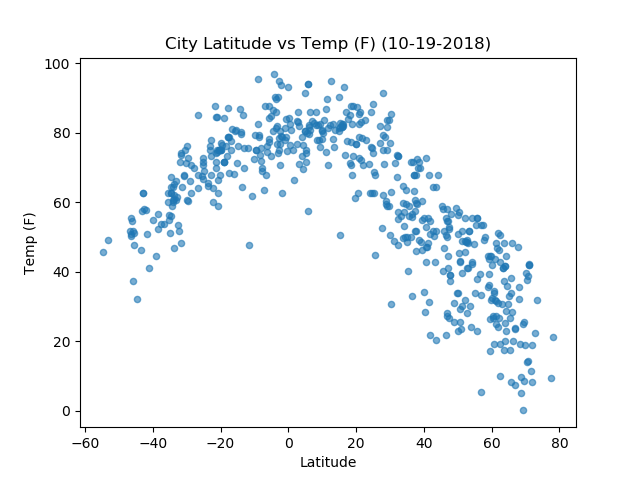

Text(0.5,1,'City Latitude vs Temp (F) (10-19-2018)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Temp (F)')

In [56]:
# Creating a scatter plot for latitude vs temperature
citiweather_df_cleaned.plot.scatter(['Lat'], ['Temp (F)'], marker = 'o', facecolors = 'b', alpha = 0.6)
# Chart information
plt.title('City Latitude vs Temp (F) (10-19-2018)')
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')

# Exporting chart as png file
plt.savefig('output/City Latitude vs Temp (F) (10-19-2018).png')
plt.show()

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


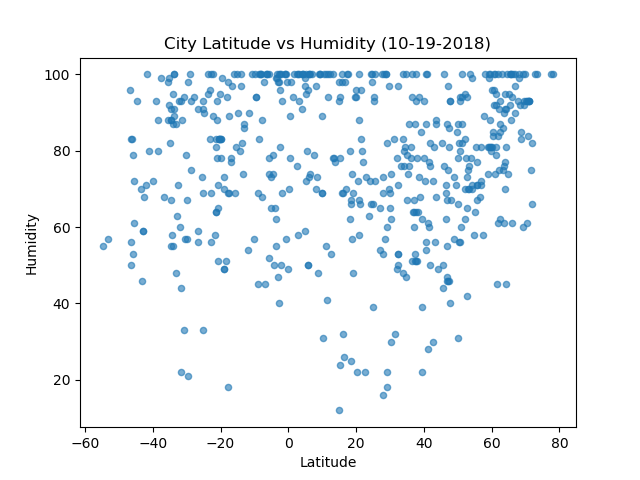

Text(0.5,1,'City Latitude vs Humidity (10-19-2018)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Humidity')

In [57]:
# Creating a scatter plot for latitude vs humidity
citiweather_df_cleaned.plot.scatter(['Lat'], ['Humidity'], marker = 'o', facecolors = 'b', alpha = 0.6)
# Chart information
plt.title('City Latitude vs Humidity (10-19-2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Exporting chart as png file
plt.savefig('output/City Latitude vs Humidity (10-19-2018).png')
plt.show()

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


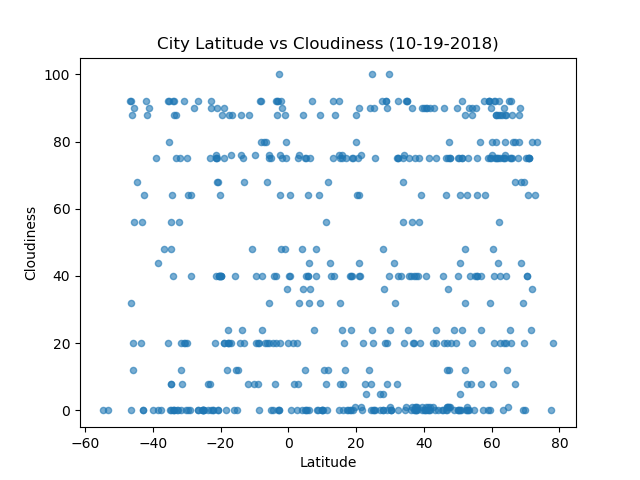

Text(0.5,1,'City Latitude vs Cloudiness (10-19-2018)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Cloudiness')

In [58]:
# Creating a scatter plot for latitude vs cloudiness
citiweather_df_cleaned.plot.scatter(['Lat'], ['Cloudiness'], marker = 'o', facecolors = 'b', alpha = 0.6)
# Chart information
plt.title('City Latitude vs Cloudiness (10-19-2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Exporting chart as png file
plt.savefig('output/City Latitude vs Cloudiness (10-19-2018).png')
plt.show()

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


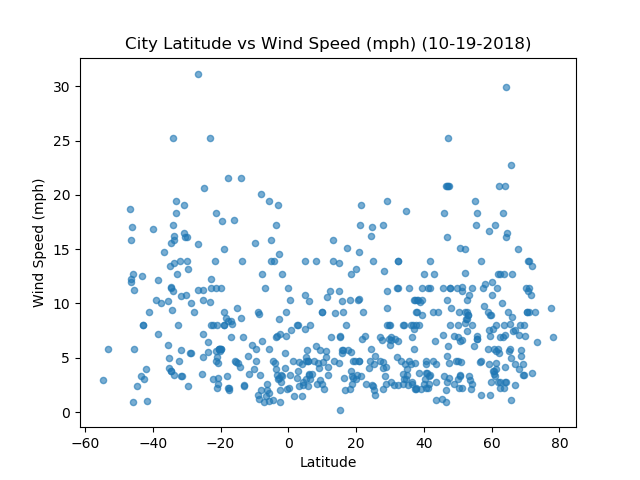

Text(0.5,1,'City Latitude vs Wind Speed (mph) (10-19-2018)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Wind Speed (mph)')

In [60]:
# Creating a scatter plot for latitude vs wind speed
citiweather_df_cleaned.plot.scatter(['Lat'], ['Wind Speed'], marker = 'o', facecolors = 'b', alpha = 0.6)
# Chart information
plt.title('City Latitude vs Wind Speed (mph) (10-19-2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Exporting chart as png file
plt.savefig('output/City Latitude vs Wind Speed (mph) (10-19-2018).png')
plt.show()

## Observations
- We cannot make too many generalizations as this data is a day snapshot of the current weather of a randomized set of cities; however, it is fair to state that cities closer to the equator (with latitude closer to 0) are warmer than those farther away (with latitudes further away from 0 in both positive and negative directions).
- It was interesting to see that humidity is high for a good number of the cities in the dataset, regardless of latitude.
- There does not seem to be a strong relationship between latitude and cloudiness (I would also argue that the measurement of cloudiness by OWM and quite possibly the measurement of a unit of 'cloudiness' is somewhat arbitrary, and difficult to discern meaningful insight from such calculations, since there are distinct 'bands' which indicate numerous instances of the same level of cloudiness across cities regardless of latitude.)
- There seems to be a weak/negligible relationship between latitude and wind speed, with some minor clustering of low windspeeds in the higher latitudes/northern hemisphere. (This variable is probably best measured over time, not in a snapshot instance like the current dataset. Also, I would argue elevation as a third variable is necessary to determine whether there is a relationship between wind speed and latitude, which is not captured with the current dataset.)

See output directory below for csv file of citiweather dataframe and image exports: 

https://github.com/Emanste92/UCBEx_DataAnalytics/tree/master/WeatherPy/output